In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [5]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(market_data_df)
scaled_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
crypto_names = market_data_df.index.copy()

# Set the coinid column as index
scaled_data_df = scaled_data_df.reset_index(drop=True)
scaled_data_df.index = crypto_names

# Display sample data
scaled_data_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
import warnings
warnings.filterwarnings("ignore")
for k in k_values:
    model=KMeans(n_clusters=k)
    model.fit(scaled_data_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,66.099188
5,6,53.690532
6,7,43.926256
7,8,37.322180
8,9,32.642944
9,10,28.611052


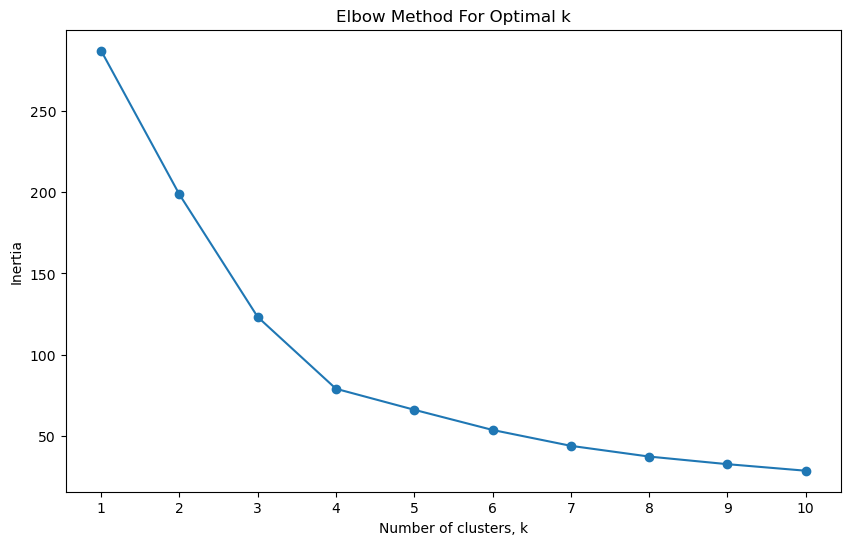

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Best value is 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4)


In [9]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_data_df)


KMeans(n_clusters=4)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(scaled_data_df)

# View the resulting array of cluster values.
print(clusters)


[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [11]:
# Create a copy of the DataFrame
scaled_data_df = scaled_data_df.copy()


In [12]:
# Add a new column to the DataFrame with the predicted clusters
scaled_data_df["Cluster"] = clusters

# Display sample data
scaled_data_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


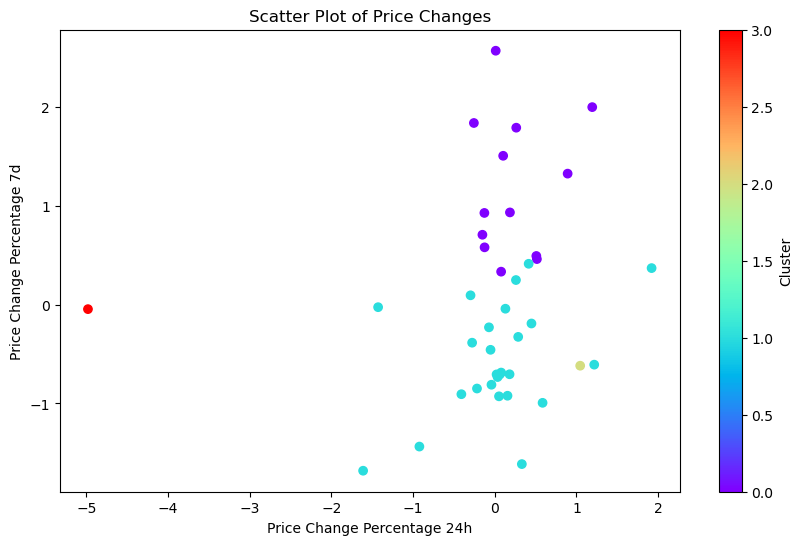

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data_df['price_change_percentage_24h'], scaled_data_df['price_change_percentage_7d'], c=scaled_data_df['Cluster'], cmap='rainbow')
plt.xlabel('Price Change Percentage 24h')
plt.ylabel('Price Change Percentage 7d')
plt.title('Scatter Plot of Price Changes')
plt.colorbar(label='Cluster')
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)


In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca = pca_model.fit_transform(scaled_data_df)

# View the first five rows of the DataFrame. 
pca[:5]


array([[-0.98927075,  0.71515999,  0.49382193],
       [-0.80114992,  0.38686277,  1.01001186],
       [-0.25723805, -0.29436771, -0.71543698],
       [-0.28931239, -0.35459601, -0.56121306],
       [-1.84988759,  1.75473268,  1.71168922]])

In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
print(f"Explained Variance : {explained_variance}")
print(f"Total Explained Variance : {explained_variance.sum()}")


Explained Variance : [0.38141983 0.33155857 0.17643803]
Total Explained Variance : 0.8894164303643379


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8846

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you


# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2', 'PC3'], index=scaled_data_df.index)

# Copy the crypto names from the original data
pca_df['coinid'] = scaled_data_df.index

# Set the coinid column as index
pca_df = pca_df.set_index('coinid')

# Display sample data
pca_df.head()


,PC1,PC2,PC3
coinid,,,
bitcoin,-0.989271,0.715160,0.493822
ethereum,-0.801150,0.386863,1.010012
tether,-0.257238,-0.294368,-0.715437
ripple,-0.289312,-0.354596,-0.561213
bitcoin-cash,-1.849888,1.754733,1.711689


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'K': k_values, 'Inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow


,K,Inertia
0,1,269.102703
1,2,175.890121
2,3,99.179766
3,4,46.988179
4,5,36.404552
5,6,26.957063
6,7,20.371932
7,8,16.879950
8,9,13.972467
9,10,10.582706


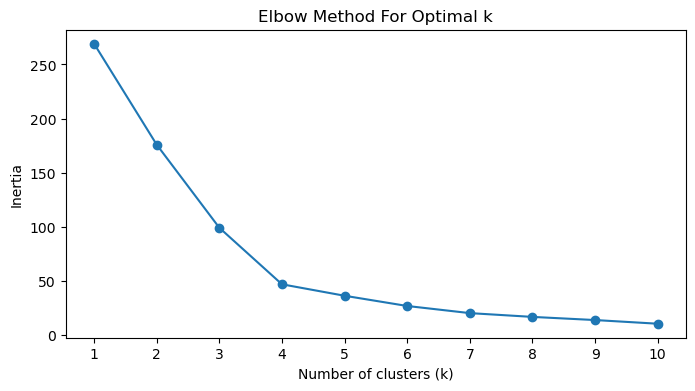

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Best value for k is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best k value is the same as the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)


In [21]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)


KMeans(n_clusters=4)

In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = model.predict(pca_df)

# Print the resulting array of cluster values.
print(clusters_pca)


[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [23]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['crypto_cluster'] = clusters_pca

# Display sample data
pca_df_copy.head()


,PC1,PC2,PC3,crypto_cluster
coinid,,,,
bitcoin,-0.989271,0.715160,0.493822,0
ethereum,-0.801150,0.386863,1.010012,0
tether,-0.257238,-0.294368,-0.715437,1
ripple,-0.289312,-0.354596,-0.561213,1
bitcoin-cash,-1.849888,1.754733,1.711689,0


In [24]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
scatter_plot = pca_df_copy.hvplot.scatter(x='PC1', y='PC2', by='crypto_cluster', title="PCA Scatter Plot")

scatter_plot



:NdOverlay   [crypto_cluster]
   :Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [25]:
# Use the columns from the original scaled DataFrame as the index.
labels = pd.DataFrame(pca_model.components_, columns=scaled_data_df.columns, index=[f'Principal Component {i+1}' for i in range(pca_model.n_components_)])

# Display the loadings
print(labels)


                       price_change_percentage_24h  \
Principal Component 1                    -0.451387   
Principal Component 2                     0.238330   
Principal Component 3                    -0.284351   

                       price_change_percentage_7d  \
Principal Component 1                   -0.191827   
Principal Component 2                    0.206278   
Principal Component 3                    0.740391   

                       price_change_percentage_14d  \
Principal Component 1                    -0.145765   
Principal Component 2                     0.524673   
Principal Component 3                     0.302255   

                       price_change_percentage_30d  \
Principal Component 1                     0.062756   
Principal Component 2                     0.588682   
Principal Component 3                    -0.184668   

                       price_change_percentage_60d  \
Principal Component 1                     0.220432   
Principal Component 2       

In [26]:
components = pca_model.components_
weights_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])], index=scaled_data_df.columns)

weights_df

,PC1,PC2,PC3
price_change_percentage_24h,-0.451387,0.238330,-0.284351
price_change_percentage_7d,-0.191827,0.206278,0.740391
price_change_percentage_14d,-0.145765,0.524673,0.302255
price_change_percentage_30d,0.062756,0.588682,-0.184668
price_change_percentage_60d,0.220432,0.494463,-0.335327
price_change_percentage_200d,0.543217,0.175879,0.105761
price_change_percentage_1y,0.553180,-0.001658,0.270870
Cluster,0.290832,-0.058227,-0.220238


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**   PC1 Strongest Positive Influence: price_change_percentage_1y    0.536014
                    Strongest Negative Influence: price_change_percentage_24h   -0.450906
                
                PC2 Strongest Positive Influence: price_change_percentage_30d    0.559913
                    Strongest Negative Influence: Cluster   -0.172065

                PC3 Strongest Positive Influence: price_change_percentage_7d    0.525713
                    Strongest Negative Influence: Cluster   -0.559966